In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("House Prices.csv")

In [3]:
df.head()

,ID,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,...,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,zipcode,Lat,Long,Sqft_living15,Sqft_lot15
0,1,20140916T000000,280000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1,2,20150422T000000,300000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2,3,20140508T000000,647500.0,4,1.75,2060,26036,1.0,0,0,...,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891
3,4,20140811T000000,400000.0,3,1.00,1460,43000,1.0,0,0,...,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023
4,5,20150401T000000,235000.0,3,1.00,1430,7599,1.5,0,0,...,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320


In [4]:
df.info

<bound method DataFrame.info of           ID             Date     Price  Bedrooms  Bathrooms  Sqft_living  \
0          1  20140916T000000  280000.0         6       3.00         2400   
1          2  20150422T000000  300000.0         6       3.00         2400   
2          3  20140508T000000  647500.0         4       1.75         2060   
3          4  20140811T000000  400000.0         3       1.00         1460   
4          5  20150401T000000  235000.0         3       1.00         1430   
...      ...              ...       ...       ...        ...          ...   
21608  21609  20140725T000000  365000.0         5       2.00         1600   
21609  21610  20150311T000000  380000.0         2       1.00         1040   
21610  21611  20140624T000000  339000.0         3       1.00         1100   
21611  21612  20140703T000000  399900.0         2       1.75         1410   
21612  21613  20141030T000000  268950.0         3       1.00         1320   

       Sqft_lot  Floors  Waterfront  View  

In [7]:
print("Id of houses : {}".format(len(df.ID)))

Id of houses : 21613


In [8]:
def check_missing_value(df):
    missing_features=[]
    for i in df.columns:
        temp = df[i].isnull().sum()
        if temp!=0:
            print(i," feature has ",temp," missing value")
            missing_features.append(i)
    return missing_features

def check_features_datatype(df):
    categorical_feature = [i  for i in df.columns if df[i].dtype == 'O']
    numerical_feature = [i  for i in df.columns if df[i].dtype!= 'O']
    return categorical_feature,numerical_feature

def _check_datatype_is_string(df,feature):
    if df[feature] == 'O':
        return True
    else:
        return False

In [9]:
categorical_features , numerical_features = check_features_datatype(df)

In [14]:
missing_features=check_missing_value(df)

In [15]:
df.columns

Index(['ID', 'Date', 'Price', 'Bedrooms', 'Bathrooms', 'Sqft_living',
       'Sqft_lot', 'Floors', 'Waterfront', 'View', 'Condition', 'Grade',
       'Sqft_above', 'Sqft_basement', 'Yr_built', 'Yr_renovated', 'zipcode',
       'Lat', 'Long', 'Sqft_living15', 'Sqft_lot15'],
      dtype='object')

# Feature Engineering

In [16]:
df.drop(['ID'],axis=1,inplace=True)

In [17]:
for i in missing_features:
    if i in numerical_features:
        temp=df[i].mean()
        df[i].fillna(temp,inplace=True)
    if i in categorical_features:
        temp=df[i].mode()[0]
        df[i].fillna(temp,inplace=True)

In [18]:
missing_features=check_missing_value(df)
print("Number of Features having missing values : ",len(missing_features))

Number of Features having missing values :  0


In [19]:
df.head()

,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,zipcode,Lat,Long,Sqft_living15,Sqft_lot15
0,20140916T000000,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1,20150422T000000,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2,20140508T000000,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891
3,20140811T000000,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023
4,20150401T000000,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320


In [20]:
for i in categorical_features:
    dict={}
    count=1
    for j in df[i].unique():
        dict[j]=count
        count+=1
    df[i]=df[i].map(dict)

In [21]:
df.head()

,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,Waterfront,View,Condition,Grade,Sqft_above,Sqft_basement,Yr_built,Yr_renovated,zipcode,Lat,Long,Sqft_living15,Sqft_lot15
0,1,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1,2,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2,3,647500.0,4,1.75,2060,26036,1.0,0,0,4,8,1160,900,1947,0,98166,47.4444,-122.351,2590,21891
3,4,400000.0,3,1.00,1460,43000,1.0,0,0,3,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023
4,5,235000.0,3,1.00,1430,7599,1.5,0,0,4,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320


In [22]:
categorical_features , numerical_features = check_features_datatype(df)
print("Number of Categorical features : ",len(categorical_features))

Number of Categorical features :  0


# splitting data

In [23]:
from sklearn.model_selection import train_test_split

In [26]:
x = df.drop(['Price'],axis=1)
y=df['Price']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Feature Selection

In [27]:
from sklearn.feature_selection import mutual_info_regression , SelectPercentile

In [28]:
mutual_info = mutual_info_regression(x_train , y_train)
mutual_info

array([0.00428899, 0.0909929 , 0.20011234, 0.35404246, 0.06482498,
       0.07616458, 0.01249491, 0.0555064 , 0.        , 0.34930062,
       0.26909994, 0.06337591, 0.07782046, 0.01288683, 0.42047429,
       0.34162168, 0.11284985, 0.27322142, 0.0789675 ])

In [29]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

zipcode          0.420474
Sqft_living      0.354042
Grade            0.349301
Lat              0.341622
Sqft_living15    0.273221
Sqft_above       0.269100
Bathrooms        0.200112
Long             0.112850
Bedrooms         0.090993
Sqft_lot15       0.078967
Yr_built         0.077820
Floors           0.076165
Sqft_lot         0.064825
Sqft_basement    0.063376
View             0.055506
Yr_renovated     0.012887
Waterfront       0.012495
Date             0.004289
Condition        0.000000
dtype: float64

In [30]:
mutual_info.head()

Date           0.004289
Bedrooms       0.090993
Bathrooms      0.200112
Sqft_living    0.354042
Sqft_lot       0.064825
dtype: float64

<AxesSubplot:>

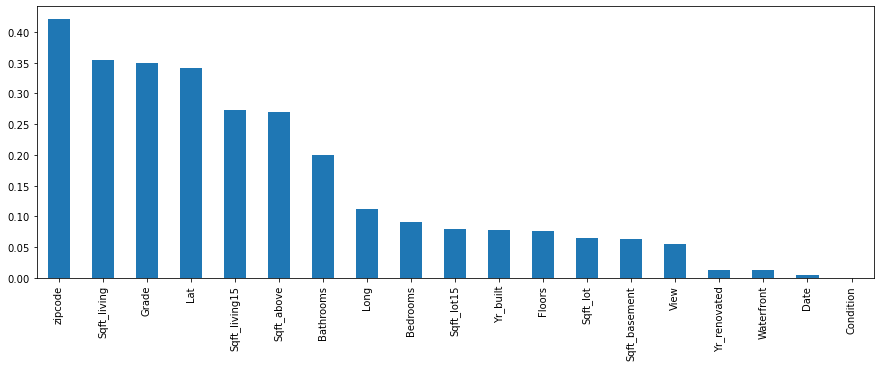

In [31]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [32]:
from sklearn.feature_selection import SelectPercentile

In [33]:
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=60)
selected_top_columns.fit(x_train, y_train)

SelectPercentile(percentile=60,
                 score_func=<function mutual_info_regression at 0x0000019437385C10>)

In [34]:
selected_top_columns.get_support()

array([False,  True,  True,  True, False,  True, False, False, False,
        True,  True, False, False, False,  True,  True,  True,  True,
        True])

In [35]:
selected_columns = x_train.columns[selected_top_columns.get_support()]

In [37]:
print("Out of total {} features Selected Features are {}".format(len(x_train.columns),len(selected_columns)))

Out of total 19 features Selected Features are 11


In [38]:
selected_train_features = x_train[selected_columns]
selected_train_features

,Bedrooms,Bathrooms,Sqft_living,Floors,Grade,Sqft_above,zipcode,Lat,Long,Sqft_living15,Sqft_lot15
6325,5,2.50,2250,1.0,8,1280,98058,47.4501,-122.139,2140,9592
13473,5,2.75,2000,1.0,7,1260,98023,47.3155,-122.347,1960,6514
17614,5,3.50,4000,2.0,9,4000,98024,47.5265,-121.887,3690,6600
16970,4,1.75,1860,1.0,7,1080,98125,47.7310,-122.301,1800,9364
20868,3,2.50,2300,2.0,9,2300,98052,47.6842,-122.155,2300,8187
...,...,...,...,...,...,...,...,...,...,...,...
11964,4,3.00,1960,1.0,7,1170,98106,47.5313,-122.360,1960,5160
21575,3,1.00,1790,1.5,7,1090,98144,47.5750,-122.288,1360,4080
5390,3,1.00,1030,1.5,5,1030,98042,47.3750,-122.166,1330,10342
860,2,1.00,830,1.0,6,830,98133,47.7466,-122.334,1340,6040


In [39]:
selected_test_features = x_test[selected_columns]
selected_test_features

,Bedrooms,Bathrooms,Sqft_living,Floors,Grade,Sqft_above,zipcode,Lat,Long,Sqft_living15,Sqft_lot15
735,4,1.75,1560,1.0,7,1560,98092,47.3384,-122.164,2460,44907
2830,3,1.00,1190,1.5,6,1190,98144,47.5985,-122.298,1680,3600
4106,3,1.00,1700,1.5,7,1700,98118,47.5569,-122.277,1400,4165
16218,2,1.00,910,1.0,7,910,98126,47.5536,-122.377,1450,5000
19964,3,3.50,3110,1.0,10,3110,98004,47.6178,-122.209,3110,12433
...,...,...,...,...,...,...,...,...,...,...,...
13674,2,2.50,1390,2.0,7,1180,98118,47.5537,-122.282,1350,1821
20377,3,2.50,2390,2.0,8,2220,98027,47.5405,-122.027,2150,1984
8805,4,3.25,4386,1.0,10,2356,98092,47.3329,-122.200,3060,10925
10168,2,1.00,770,1.0,7,770,98001,47.2997,-122.269,1480,17334


# 
Applying Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [42]:
lr = LinearRegression()
lr.fit(selected_train_features , y_train)
pred = lr.predict(selected_test_features)
print(r2_score(pred , y_test))

0.4256545695134025
